# Pacotes
---

In [2]:
library(dplyr)
library(ggplot2)
library(AER)
library(gvlma)
library(lmtest)
library(nortest)
library(ggpubr)
library(plyr)

In [3]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [35]:
df = data[data$CO_GRUPO == 13,]

In [36]:
dim(df)

[1] 9582  137

## Criando uma variável Dummy para UFPR IES 571
* Número de verificações = 114

In [37]:
df$ufpr = as.factor(ifelse(df$CO_IES == 571,1,0))

In [38]:
table(df$ufpr)


   0    1 
9468  114 

In [39]:
df_1 = df %>% 
        select(NT_GER, ufpr, TP_SEXO, NU_IDADE,QE_I02, QE_I08, QE_I21, QE_I10,QE_I23) %>% 
        setNames(c("nota", "ufpr", "genero", "idade","cor", "renda", "escolaridade_pais","trabalho", "esforco"))

In [40]:
head(df_1)

,nota,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco
161,24.9,0,F,28,A,C,B,E,C
162,25.6,0,M,30,A,D,A,E,B
163,48.7,0,M,29,A,C,B,E,C
164,35.7,0,F,22,A,B,A,E,B
165,33.9,0,M,47,A,B,A,E,C
166,23.5,0,M,27,A,C,B,E,C


# Nomeando as categorias
---

In [41]:
df_1$cor = mapvalues(df_1$cor, from=c("A","B","C","D","E","F"), to=c("branca","preta","amarela","parda","indigina","não declarado"))
df_1$renda = mapvalues(df_1$renda, from=c("A","B","C","D","E","F","G"), to=c("Até 1.5 salário mínimo","De 1.5 a 3 salários mínimos",
                                                                "De 3 a 4.5 salários mínimos","De 4.5 a 6 salários mínimos","De 6 a 10 salários mínimos",
                                                                                "10 a 30 salários mínimos", "Acima de 30 salários mínimos"))
df_1$escolaridade_pais = mapvalues(df_1$escolaridade_pais, from=c("A","B"), to=c("sim","não"))
df_1$trabalho = mapvalues(df_1$trabalho, from=c("A","B","C","D","E"), to=c("Não trabalha",
                                                                  "Trabalha eventualmente",
                                                                 "Trabalha até 20 hrs. semanais",
                                                                 "Trabalha de 21 a 39 hrs. semanais",
                                                                 "Trabalha 40 hrs. semanais ou mais"))
df_1$esforco = mapvalues(df_1$esforco, from=c("A","B","C","D","E"), to=c("Nenhuma, apenas assistindo as aulas","De uma a três",
                                                                "De quatro a sete","De oito adoze","Mais de doze"))

In [42]:
head(df_1)

,nota,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco
161,24.9,0,F,28,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete
162,25.6,0,M,30,branca,De 4.5 a 6 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De uma a três
163,48.7,0,M,29,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete
164,35.7,0,F,22,branca,De 1.5 a 3 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De uma a três
165,33.9,0,M,47,branca,De 1.5 a 3 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De quatro a sete
166,23.5,0,M,27,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete


## A média das notas da Ufpr são levemente maiores

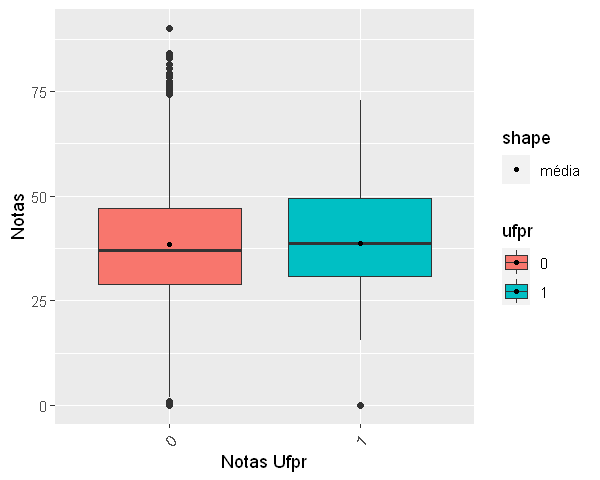

In [48]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_1, aes(x=ufpr, y=nota, fill=ufpr)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
    xlab("Notas Ufpr")+
    ylab("Notas")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));

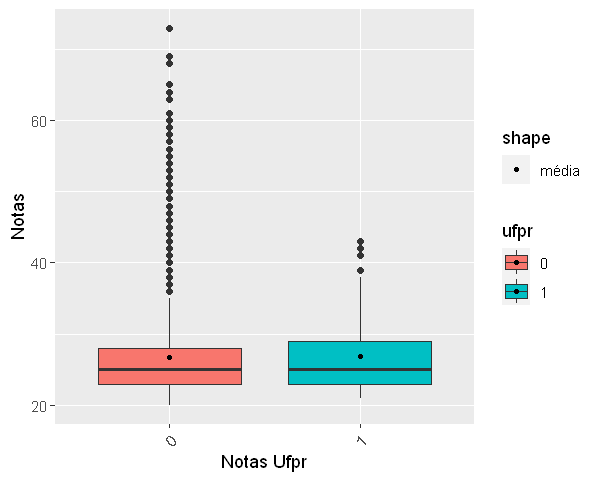

In [49]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_1, aes(x=ufpr, y=idade, fill=ufpr)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
    xlab("Notas Ufpr")+
    ylab("Notas")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));